# Limits of Diversification
We're going to look at what happens when markets fall.

In [125]:
import pandas as pd
import numpy as np
import risk_kit as rk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
ind_return= rk.get_ind_returns()
ind_nfirms= rk.get_ind_nfirms() # nubmer of firms
ind_size= rk.get_ind_size() # avg company size 

In [127]:
#These 3 should have same shape
ind_return.shape

(1110, 30)

In [128]:
ind_nfirms.shape

(1110, 30)

In [129]:
ind_size.shape

(1110, 30)

In [130]:
#Construct our market index
#Market Capitalizattion
ind_mktcap = ind_nfirms * ind_size 
ind_mktcap.shape

(1110, 30)

In [131]:
#Total Mkt Cap
total_mktcap= ind_mktcap.sum(axis='columns')
total_mktcap

1926-07       26657.94
1926-08       27436.34
1926-09       28060.41
1926-10       28057.23
1926-11       27198.40
              ...     
2018-08    29949911.36
2018-09    30990177.46
2018-10    30918505.63
2018-11    28463290.74
2018-12    28851651.12
Freq: M, Length: 1110, dtype: float64

<AxesSubplot:>

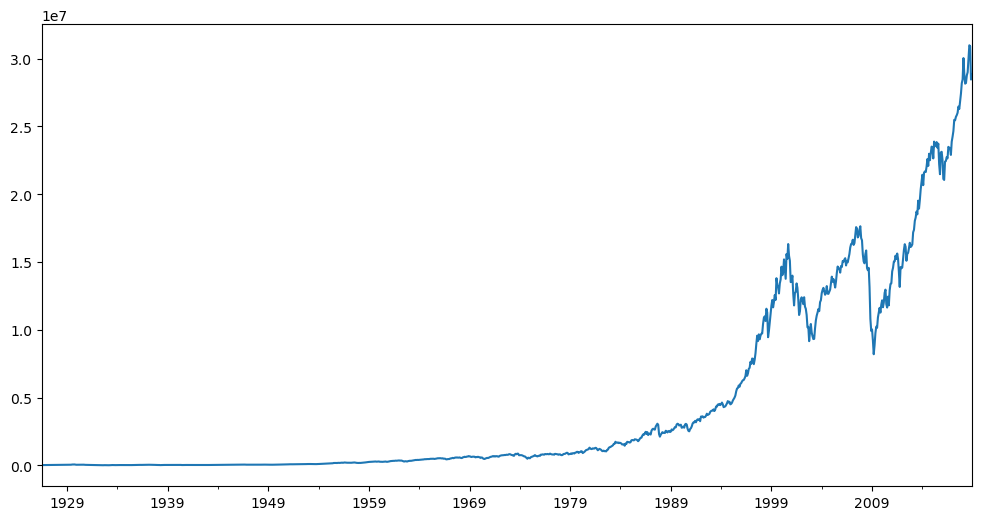

In [132]:
#We do see some crashes happen
total_mktcap.plot(figsize=(12,6))

In [133]:
#Industry Mkt Cap weights
ind_capweight = ind_mktcap.divide(total_mktcap, axis= 'rows')#Compute that for every rows
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [134]:
#The sum of all columns in a row should be 1
ind_capweight.sum(axis=1)

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
          ... 
2018-08    1.0
2018-09    1.0
2018-10    1.0
2018-11    1.0
2018-12    1.0
Freq: M, Length: 1110, dtype: float64

<AxesSubplot:>

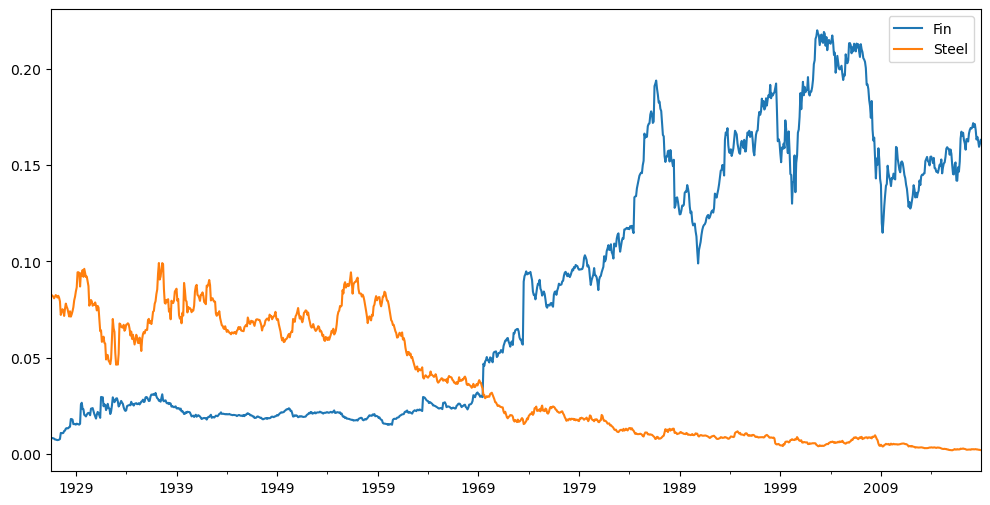

In [135]:
ind_capweight[['Fin', 'Steel']].plot(figsize=(12,6))

S&P 500 takes the top 500 stocks and computes a portfolio that consists of the prices of all those companies, proportional to their market capitalization.  
We're going to do the same thing.

In [136]:
total_market_return = (ind_capweight * ind_return).sum(axis= 'columns')
total_market_return

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

<AxesSubplot:>

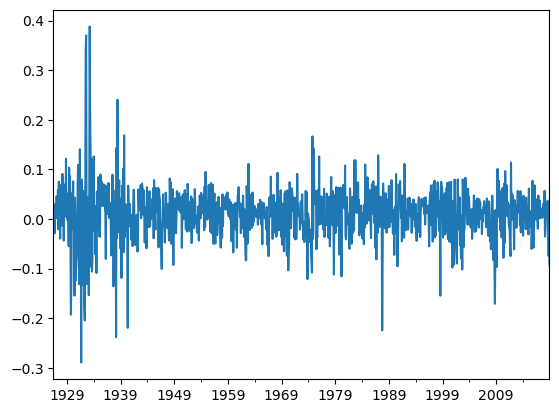

In [137]:
total_market_return.plot()

In [138]:
rk.drawdown(total_market_return)

,Wealth,Peaks,Drawdown
1926-07,1.031375e+03,1.031375e+03,0.000000
1926-08,1.061241e+03,1.061241e+03,0.000000
1926-09,1.067148e+03,1.067148e+03,0.000000
1926-10,1.036730e+03,1.067148e+03,-0.028504
1926-11,1.065798e+03,1.067148e+03,-0.001265
...,...,...,...
2018-08,7.839752e+06,7.839752e+06,0.000000
2018-09,7.856277e+06,7.856277e+06,0.000000
2018-10,7.272620e+06,7.856277e+06,-0.074292
2018-11,7.410821e+06,7.856277e+06,-0.056701


<AxesSubplot:title={'center':'Total Market CapWeighted Index'}>

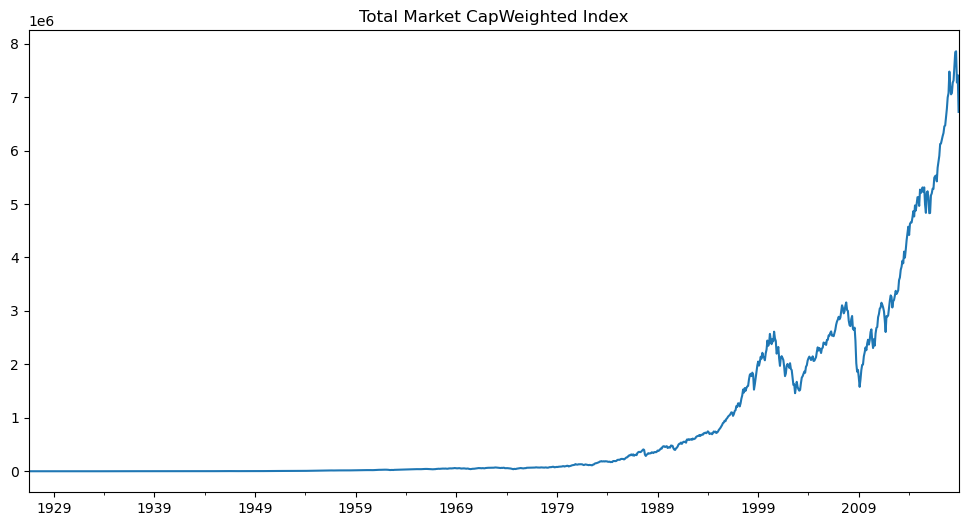

In [139]:
total_market_index = rk.drawdown(total_market_return)['Wealth']
total_market_index.plot(figsize=(12,6), title= 'Total Market CapWeighted Index')

In [140]:
#3years (36month) moving average after 1980
total_market_index['1980':].rolling(window=36).mean()

1980-01             NaN
1980-02             NaN
1980-03             NaN
1980-04             NaN
1980-05             NaN
               ...     
2018-08    6.126627e+06
2018-09    6.210566e+06
2018-10    6.267928e+06
2018-11    6.328293e+06
2018-12    6.372691e+06
Freq: M, Name: Wealth, Length: 468, dtype: float64

<AxesSubplot:>

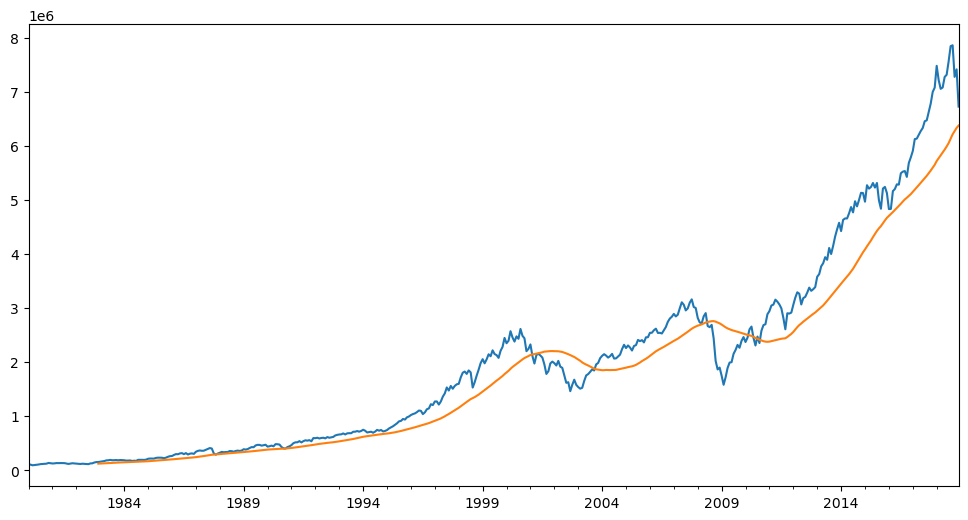

In [141]:
total_market_index['1980':].plot(figsize=(12,6))
total_market_index['1980':].rolling(window=36).mean().plot(figsize=(12,6))

In [142]:
#Total market index trailing 36 month returns
tmi_tr36mrets= total_market_return.rolling(window=36).agg(rk.annualized_rets, periods_per_year=12)
tmi_tr36mrets

1926-07         NaN
1926-08         NaN
1926-09         NaN
1926-10         NaN
1926-11         NaN
             ...   
2018-08    0.162543
2018-09    0.175679
2018-10    0.117769
2018-11    0.122645
2018-12    0.094723
Freq: M, Length: 1110, dtype: float64

<AxesSubplot:>

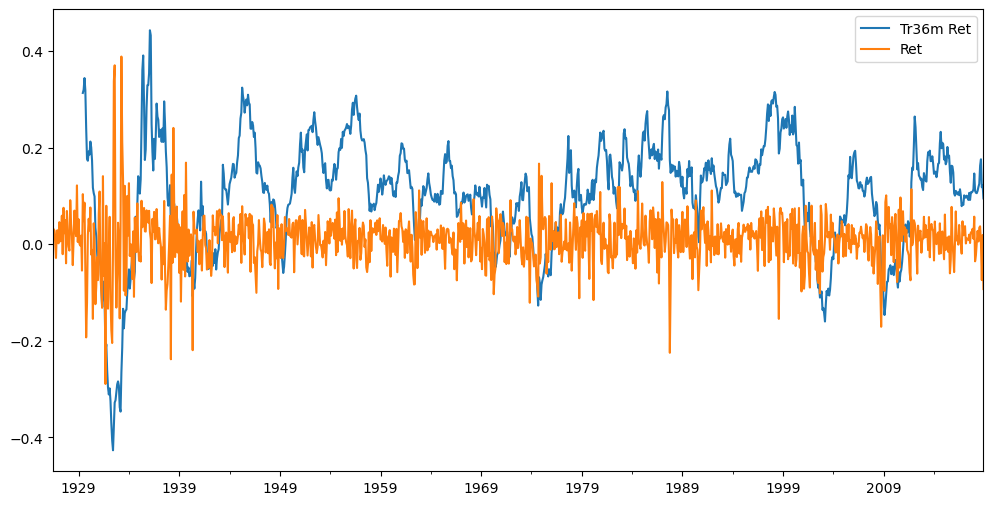

In [143]:
tmi_tr36mrets.plot(figsize=(12,6), label='Tr36m Ret',legend= True)
total_market_return.plot(label= 'Ret',legend=True)

Let's compute the average correlation across these industries and compare that correlation wtih index returns.

In [144]:
# Rolling Correlation - along with multi-index and '.groupby'
ts_corr= ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

This is good but not actually what we want.  
We want to look at the whole average correlation in each month, for exmaple the average correlation in 2018-12.

In [145]:
#Give the index columns names
ts_corr.index.names =['Date', 'Industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [146]:
ind_tr36corr = ts_corr.groupby('Date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr

Date
1926-07         NaN
1926-08         NaN
1926-09         NaN
1926-10         NaN
1926-11         NaN
             ...   
2018-08    0.416673
2018-09    0.401186
2018-10    0.409397
2018-11    0.403975
2018-12    0.479502
Freq: M, Length: 1110, dtype: float64

<AxesSubplot:xlabel='Date'>

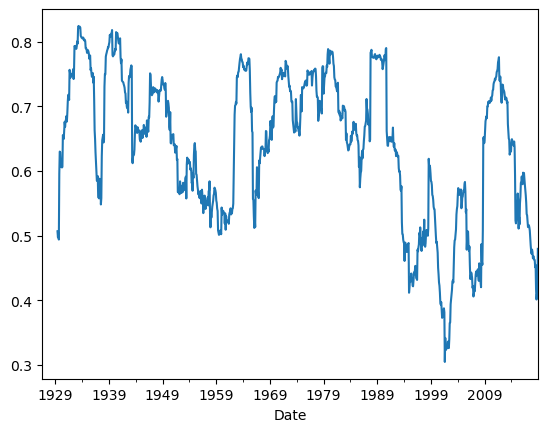

In [147]:
ind_tr36corr.plot()

<AxesSubplot:>

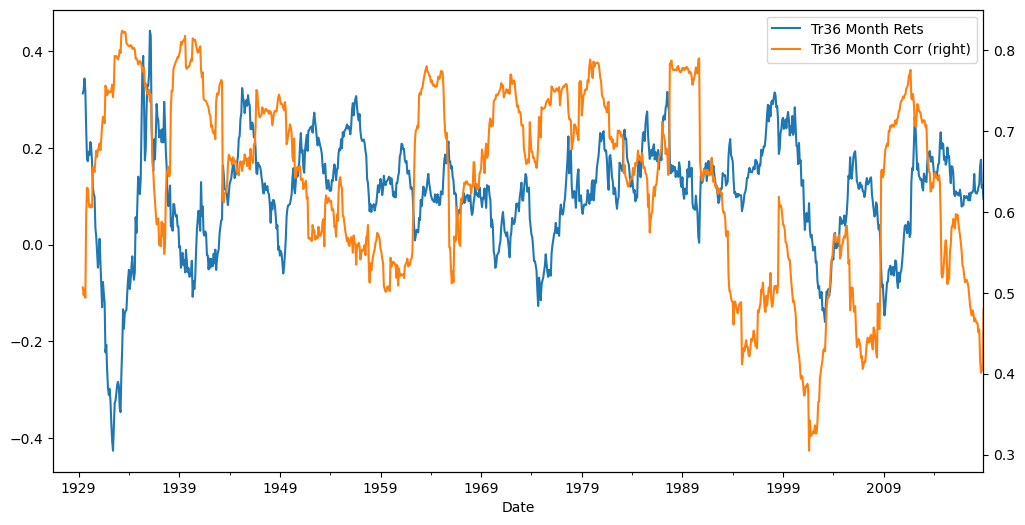

In [148]:
#Plot the return and corr together
#Notice that these 2 stuff do not have the same unit
tmi_tr36mrets.plot(label= 'Tr36 Month Rets', figsize= (12,6), legend=True)
ind_tr36corr.plot(label= 'Tr36 Month Corr', figsize= (12,6), legend= True, secondary_y=True)

We can observe that the trends of the return and correlation are sometimes the same and somtimes opposite.

<AxesSubplot:>

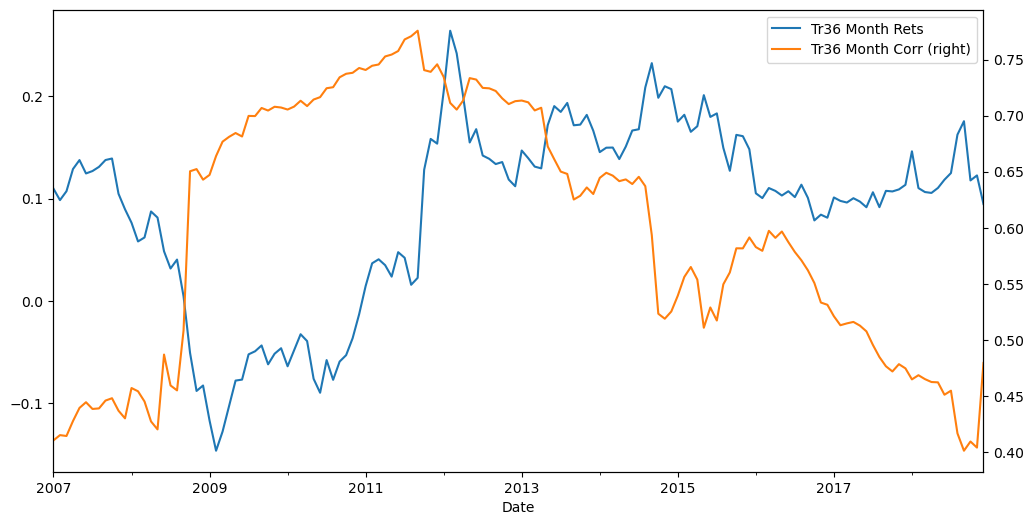

In [149]:
tmi_tr36mrets['2007':].plot(label= 'Tr36 Month Rets', figsize= (12,6), legend=True)
ind_tr36corr['2007':].plot(label= 'Tr36 Month Corr', figsize= (12,6), legend= True, secondary_y=True)

But when the market is crashed, the correlation is skyrocketing.   
Take approx. 0.75 above as an example, when the correlation meets such a degree, diversification is not gonna help you. 

In [150]:
tmi_tr36mrets.corr(ind_tr36corr)

-0.28010065062884

The corr between trailing return and trailing corr is actually negative. 
That is really the problem of diversification.